In [245]:
!pip install scikit-plot

In [142]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [143]:
filepath="https://github.com/dsrscientist/dataset1/raw/master/titanic_train.csv"
data=pd.read_csv(filepath)

In [144]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## As we can see that Name,Sex,Ticket,Cabin,Embarked are the object that has to be converted 

In [146]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## there are missing value in the column "Age","Cabin" and "Embarked".so We have fo fill using Fillna

In [147]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## There are many "0" values the column SibSp,Parch and Fare

In [148]:
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

PassengerId
891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

Survived
0    549
1    342
Name: Survived, dtype: int64

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

Name
Otter, Mr. Richard                1
Skoog, Master. Harald             1
Eustis, Miss. Elizabeth Mussey    1
Connaghton, Mr. Michael           1
Augustsson, Mr. Albert            1
                                 ..
Brewe, Dr. Arthur Jackson         1
Tobin, Mr. Roger                  1
Lemore, Mrs. (Amelia Milley)      1
Rice, Master. Eric                1
Peduzzi, Mr. Joseph               1
Name: Name, Length: 891, dtype: int64

Sex
male      577
female    314
Name: Sex, dtype: int64

Age
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8  

## Value.count will tell how many survived and how many died and it give every column description

In [149]:
# Creating a list of columns which are numeric. 
numeric_cols = list(data.select_dtypes(exclude='object').columns)
numeric_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [150]:
# creating a list of columns which are categorical or contains string values. 
string_cols = list(data.select_dtypes(include='object').columns)
string_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

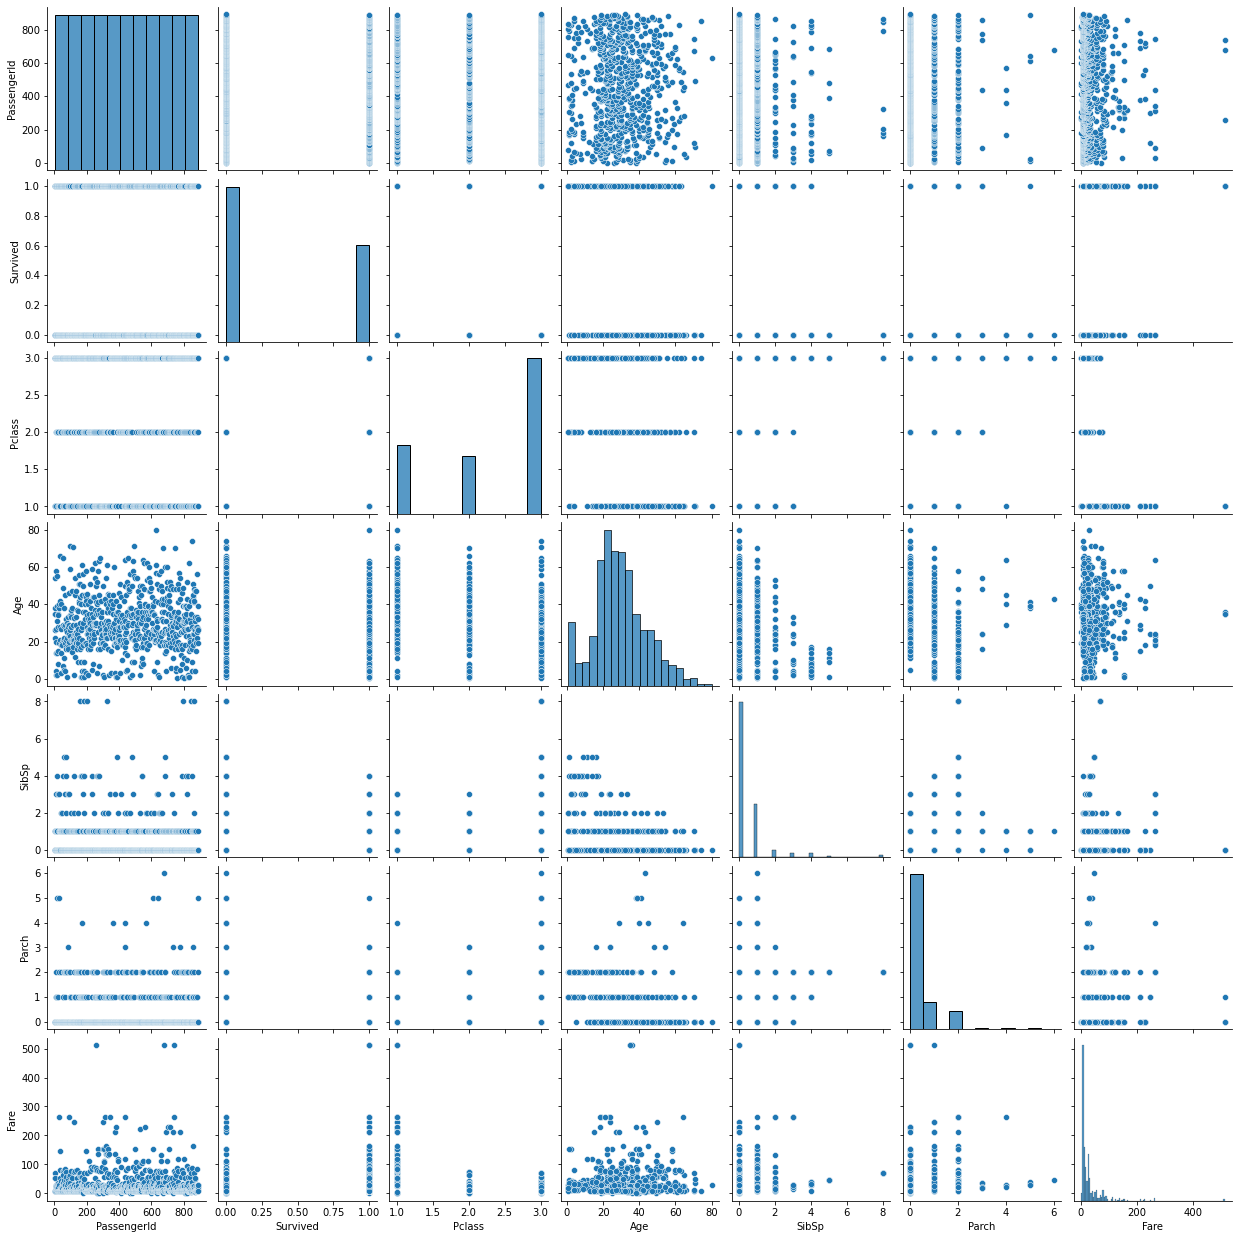

In [151]:
#lets check the data distribution of numeric columns
sns.pairplot(data[numeric_cols])
plt.show()

In [152]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Otter, Mr. Richard",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


# We want to know how well does each feature correlate with Survival

In [153]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [154]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [155]:
data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [156]:
data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


*** Classified From Above Table

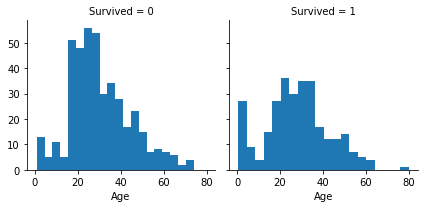

In [157]:
a= sns.FacetGrid(data, col='Survived')
a.map(plt.hist, 'Age', bins=20)

*** OBSERVATION

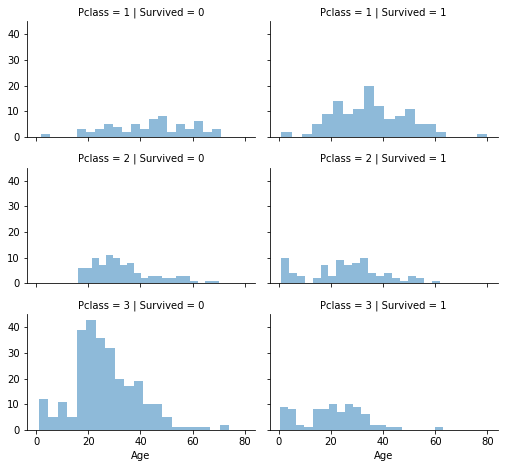

In [158]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

*** From above we Observered

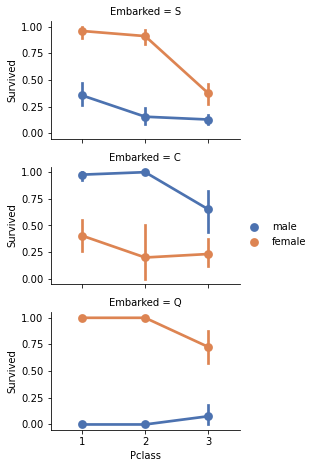

In [159]:
grid = sns.FacetGrid(data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

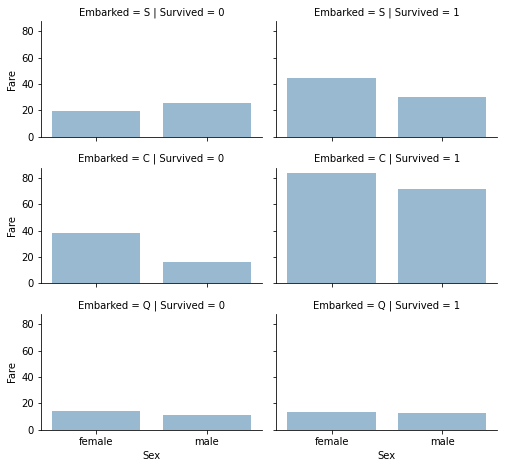

In [160]:
grid = sns.FacetGrid(data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

*** From above We Observed that:-

In [161]:
## We will drop the Feature such as Ticket and Cabin
data = data.drop(['Ticket', 'Cabin'], axis=1)

<AxesSubplot:>

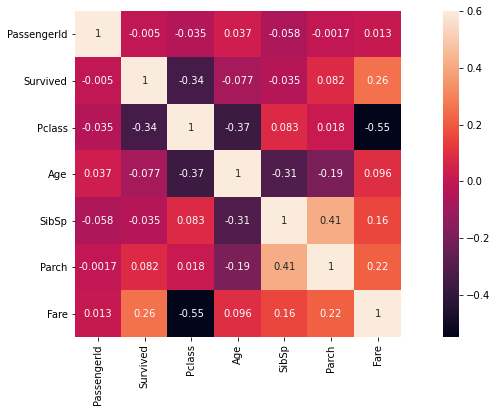

In [162]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(), vmax=0.6, square=True, annot=True)

In [163]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [164]:
data.shape

(891, 10)

In [165]:

#for dataset in data:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [166]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [167]:

data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
    

data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [168]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

data['Title'] = data['Title'].map(title_mapping)
data['Title'] = data['Title'].fillna(0)

In [169]:
## Now we have converted title categorical to numerical value
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [170]:
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
1,0,517
2,185,0
3,126,0
4,0,40
5,3,20


Now we can safely drop the Name feature from the dataset.
We also do not need the PassengerId feature in the training dataset.

In [171]:
data = data.drop(['Name', 'PassengerId'], axis=1)

In [172]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,5
887,1,1,female,19.0,0,0,30.0000,S,2
888,0,3,female,NaN,1,2,23.4500,S,2
889,1,1,male,26.0,0,0,30.0000,C,1


In [173]:
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [174]:
## successfully converted
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5
887,1,1,1,19.0,0,0,30.0000,S,2
888,0,3,1,NaN,1,2,23.4500,S,2
889,1,1,0,26.0,0,0,30.0000,C,1


More accurate way of guessing missing values is to use other correlated features.
In our case we note correlation among Age, Gender, and Pclass. 
Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. 
So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

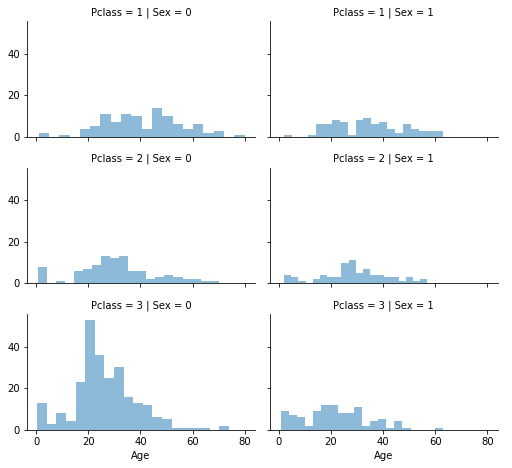

In [175]:
grid = sns.FacetGrid(data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [176]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [177]:
for i in range(0, 2):
    for j in range(0, 3):
         guess_df = data[(data['Sex'] == i) & \
                          (data['Pclass'] == j+1)]['Age'].dropna()
            
age_guess = guess_df.median()

# Convert random age float to nearest .5 age
guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

In [178]:
for i in range(0, 2):
    for j in range(0, 3):
        data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1),\
                'Age'] = guess_ages[i,j]

data['Age'] = data['Age'].astype(int)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


** Let us create Age bands and determine correlations with Survived

In [179]:
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.348936
1,"(16.0, 32.0]",0.394872
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


** Let us replace Age with ordinals based on these bands

In [180]:
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age']

33     66
54     65
96     71
116    70
280    65
456    65
493    71
630    80
672    70
745    70
851    74
Name: Age, dtype: int32

In [181]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


** Now we can Remove AgeBand

In [182]:
data = data.drop(['AgeBand'], axis=1)

In [183]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


We can create a new feature for "FamilySize" which combines 'Parch' and 'SibSp'.
This will enable us to drop Parch and SibSp from our datasets.

In [184]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


** We can create another feature called Alone

In [186]:
data['Alone'] = 0
data.loc[data['FamilySize'] == 1, 'Alone'] = 1

data[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


** Let us drop Parch, SibSp, and FamilySize features in favor of Alone

In [189]:
data = data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


** Embarked feature takes S, Q, C values based on port of embarkation. 
Our dataset has two missing values. We simply fill these with the most common occurance.

In [190]:
freq_port = data.Embarked.dropna().mode()[0]
freq_port

'S'

In [191]:
data['Embarked'] = data['Embarked'].fillna(freq_port)
    
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


** Converting 'Embarked' categorical value into numeric form

In [192]:
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


**We will create FareBand first and then convert the value into single value

In [194]:
data['FareBand'] = pd.qcut(data['Fare'], 4)
data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [195]:
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)

data = data.drop(['FareBand'], axis=1)
    
data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
5,0,3,0,0,1,2,1,1
6,0,1,0,3,3,0,1,1
7,0,3,0,0,2,0,4,0
8,1,3,1,1,1,0,3,0
9,1,2,1,0,2,1,3,0


### Splitting the data into Train and test split

In [196]:
X = data.drop("Survived", axis=1)
Y = data["Survived"]


### Model Building

In [197]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(X)
acc_log = round(logreg.score(X, Y) * 100, 2)
acc_log

78.45

In [198]:
# Support Vector Machines

svc = SVC()
svc.fit(X, Y)
Y_pred = svc.predict(X)
acc_svc = round(svc.score(X, Y) * 100, 2)
acc_svc

78.34

In [199]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, Y)
Y_pred = knn.predict(X)
acc_knn = round(knn.score(X, Y) * 100, 2)
acc_knn

79.35

In [200]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X, Y)
Y_pred = gaussian.predict(X)
acc_gaussian = round(gaussian.score(X, Y) * 100, 2)
acc_gaussian

76.99

In [201]:
linear_svc = LinearSVC()
linear_svc.fit(X, Y)
Y_pred = linear_svc.predict(X)
acc_linear_svc = round(linear_svc.score(X, Y) * 100, 2)
acc_linear_svc

78.45

In [202]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X, Y)
Y_pred = sgd.predict(X)
acc_sgd = round(sgd.score(X, Y) * 100, 2)
acc_sgd

72.5

In [221]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X, Y)
Y_pred = dt.predict(X)
acc_decision_tree = round(dt.score(X, Y) * 100, 2)
acc_decision_tree

87.09

In [204]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
Y_pred = random_forest.predict(X)
random_forest.score(X, Y)
acc_random_forest = round(random_forest.score(X, Y) * 100, 2)
acc_random_forest

87.09

### checking for CrossValidationScore

In [213]:
from sklearn.model_selection import cross_val_score
cross_lr=cross_val_score(logreg,X,Y,cv=5)
cross_lr=cross_val_score(logreg,X,Y,cv=5).mean()
cross_lr

0.7789027681878099

In [215]:
cross_svc=cross_val_score(svc,X,Y,cv=5)

cross_svc=cross_val_score(svc,X,Y,cv=5).mean()
cross_svc

0.7833908731404181

In [216]:
cross_knn=cross_val_score(knn,X,Y,cv=5)

cross_knn=cross_val_score(knn,X,Y,cv=5).mean()
cross_knn

0.7845772393446739

In [218]:
cross_gaussian=cross_val_score(gaussian,X,Y,cv=5)

cross_gaussian=cross_val_score(gaussian,X,Y,cv=5).mean()
cross_gaussian

0.7677295838302681

In [219]:
cross_linear_svc=cross_val_score(linear_svc,X,Y,cv=5)

cross_linear_svc=cross_val_score(linear_svc,X,Y,cv=5).mean()
cross_linear_svc

0.7833783190006904

In [220]:
cross_sgd=cross_val_score(sgd,X,Y,cv=5)

cross_sgd=cross_val_score(sgd,X,Y,cv=5).mean()
cross_sgd

0.7507752181281777

In [223]:
cross_dt=cross_val_score(dt,X,Y,cv=5)
cross_dt=cross_val_score(dt,X,Y,cv=5).mean()

cross_dt

0.8013746783001695

In [225]:
cross_random_forest=cross_val_score(random_forest,X,Y,cv=5)
cross_random_forest=cross_val_score(random_forest,X,Y,cv=5).mean()

cross_random_forest 

0.8058565061829139

In [226]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree],
     'cross_val_score':[cross_lr,cross_svc,cross_knn,
                       cross_gaussian,cross_linear_svc,
                       cross_sgd,cross_dt,cross_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score,cross_val_score
3,Random Forest,87.09,0.767730
7,Decision Tree,87.09,0.805857
1,KNN,79.35,0.783391
2,Logistic Regression,78.45,0.767730
6,Linear SVC,78.45,0.801375
0,Support Vector Machines,78.34,0.778903
4,Naive Bayes,76.99,0.783378
5,Stochastic Gradient Decent,72.50,0.750775


In [237]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
param_grid = {'algorithm': ['kd tree','brute'],
                       'leaf_size':[15,18,20],
                       'n_neighbors':[ 3, 5, 7,13]}
gridsearch = GridSearchCV(knn, param_grid )

In [238]:
gridsearch.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ['kd tree', 'brute'],
                         'leaf_size': [15, 18, 20],
                         'n_neighbors': [3, 5, 7, 13]})

In [239]:
best_model = gridsearch.best_params_
best_model

{'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 13}

In [241]:
knn=KNeighborsClassifier(algorithm='brute',leaf_size=15,n_neighbors=13)
knn.fit(X,Y)
y_pred=knn.predict(X)
acc_knn_score = round(knn.score(X, Y) * 100, 2)
acc_knn_score

83.5

### Plotting the ROC_AUC_CURVE

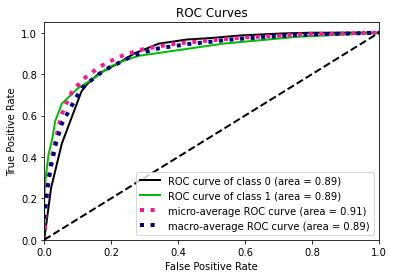

In [246]:
from sklearn.metrics import roc_curve
import scikitplot as skl
probas=knn.predict_proba(X)
skl.metrics.plot_roc(Y,probas)
plt.show()

### Saving the model

In [247]:
import joblib
joblib.dump(knn,"TitanicModel.pkl")

['TitanicModel.pkl']